## Argo Practice

The goal for this notebook is to start examining Argo data by looking at floats that have interesting profiles/sections. For a list of ACTION ITEMS that will hopefully be included, see: https://github.com/ocean-transport/argo-intern/issues/1#issuecomment-1150208594

In [20]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import cartopy
import argopy

In [51]:
#list of floats IDs I find interesting
float_sel = [6901199, 3901602, 5905033, 5905051, 1902024, 5904640]

In [52]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()

argo_loader.float(float_sel[0]).to_xarray()

<xarray.Dataset>
Dimensions:                (N_POINTS: 10317)
Coordinates:
  * N_POINTS               (N_POINTS) int64 0 1 2 3 ... 10313 10314 10315 10316
    LATITUDE               (N_POINTS) float64 57.29 57.29 57.29 ... 64.49 64.49
    LONGITUDE              (N_POINTS) float64 -9.8 -9.8 -9.8 ... -32.99 -32.99
    TIME                   (N_POINTS) datetime64[ns] 2017-05-17T15:39:08 ... ...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_POINTS) int32 -1 -1 -1 -1 -1 -1 ... -1 -1 -1 -1 -1
    CYCLE_NUMBER           (N_POINTS) int32 1 1 1 1 1 1 ... 185 185 185 185 185
    DATA_MODE              (N_POINTS) <U1 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    DIRECTION              (N_POINTS) <U1 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_POINTS) int32 6901199 6901199 ... 6901199 6901199
    POSITION_QC            (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    PRES_QC                (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PSAL                   (N_POINTS) float64 35.35 35.35 35.35 ... 34.95 34.94
    PSAL_QC                (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP                   (N_POINTS) float64 10.8 10.81 10.8 ... 3.349 3.209
    TEMP_QC                (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC                (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://erddap.ifremer.fr/erddap
    Fetched_by:           amf2288
    Fetched_date:         2022/06/09
    Fetched_constraints:  phy;WMO6901199
    Fetched_uri:          ['https://erddap.ifremer.fr/erddap/tabledap/ArgoFlo...
    history:              Variables filtered according to DATA_MODE; Variable...

(<Figure size 900x540 with 1 Axes>,
 <GeoAxesSubplot:xlabel='longitude', ylabel='latitude'>)

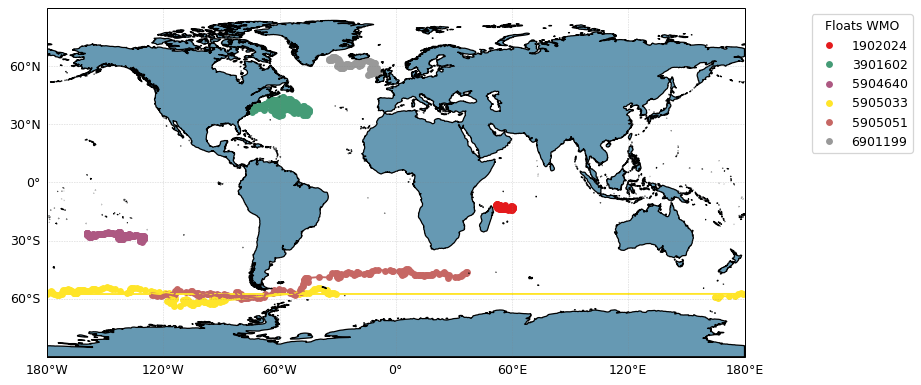

In [44]:
#plot the paths of each float on a global map

from argopy import DataFetcher as ArgoDataFetcher
idx = ArgoDataFetcher().float(float_sel).load()
idx.plot('trajectory', set_global=True)

In [65]:
#create section plots for each float

from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()

fig,ax = plt.subplots(figsize=(50,40))

for n in range(0,6):
    this_float = argo_loader.float(float_sel[n]).to_xarray()
    this_float.set_coords("PRES")
    data = this_float.TEMP
    plt.subplot(3,2,n+1)
    data.plot(y='PRES')

ValueError: y must be one of None, 'LATITUDE', 'LONGITUDE', 'N_POINTS', 'TIME'

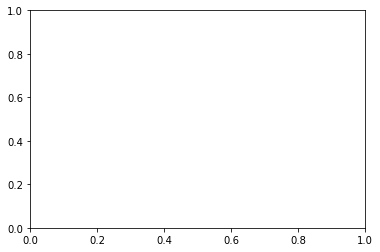

In [75]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()

this_float = argo_loader.float(float_sel[0]).to_xarray()
this_float.set_coords(('PRES'))
data = this_float.TEMP
#data.plot(y='PRES')